# Расчёт стропильной системы

## Сбор нагрузок

На крышу действуют постоянные $P_{d}$ и временные (длительные $P_{l}$ , кратковременные $P_{t}$ , особые $P_{s}$ ) нагрузки. Постоянные нагрузки: от веса частей сооружения, в том числе несущих строительных конструкций. Временные кратковременные нагрузки: от веса людей и оборудования во время производства работ на крыше. Временные длительные нагрузки: снеговая нагрузка.

### Постоянные нагрузки

Нормативное значение равномерно распределенных постоянных нагрузок определяется по формуле (\ref{eq1}): 

\begin{align}
q_{H} = t\cdot\gamma\tag{1}\label{eq1} \text{,}& \\
\text{где }&t \text{ – толщина конструкции;} \\
&\gamma \text{ – удельный вес конструкции.}
\end{align}

Расчетное значение нагрузок определяется по формуле (2): 

\begin{align}
q_{p} = q_{H}\cdot\gamma_{f}\tag{2}\label{eq2} \text{,}& \\
\text{где }&\gamma_{f} \text{ – коэффициент надёжности по нагрузке.} \\
\end{align}

Коэффициент надёжности по нагрузке для деревянных конструкций принимается 1.1 в соответствии с СП 20.13330.2016, Таблица 7.1.

Постоянная нагрузка от веса стропильной системы учитывается расчётной моделью, где указана геометрия элементов и их плотность. Дополнительно необходимо задать нагрузку от обрешётки, контробрешётки, покрытия крыши (металлочерепица). Нагрузка от одного квадратного метра кровли рассчитывается из следующих соображений: 

* обрешётка: доска 100х25 мм. Три доски на кв. м (шаг 350 мм). Плотность 0.6 $кг/л$;
* контробрешётка: брусок 50х50 мм. Два бруска на кв. м (шаг стропил 0.6 м. Плотность 0.6 $кг/л$;
* металлочерепица. Удельный весь 5 кг/$м^{2}$.


In [1]:
# Common settings
density = 0.6 # kg/l
gamma_f = 1.1
g       = 9.8 # m/s**2

# Lattice
len_l    = 100 # sm
width_l  = 10  # sm
thick_l  = 2.5 # sm
count_l  = 3

# Counterlattice
len_cl   = 100 # sm
width_cl = 5   # sm
thick_cl = 5   # sm
count_cl = 2

# Metaltile
m_mt = 5  # kg

# Resust
v_l = len_l*width_l*thick_l*count_l
v_cl = len_cl*width_cl*thick_cl*count_cl

m_wood = (v_l + v_cl)*density/1000

m = m_wood + m_mt
q = m*g*gamma_f

print('specific gravity:', m, 'kg/m^2')
print('constant loads  :', round(q, 2), 'N/m^2')

specific gravity: 12.5 kg/m^2
constant loads  : 134.75 N/m^2


### Снеговые нагрузки

Снеговые нагрузки вычисляются по формуле (\ref{eq3}):

$
\begin{align}
S_{0} = \mu \cdot S_{g} \tag{3}\label{eq3} \text{,}& \\
\text{где } &\mu \text{ – коэффициент формы, учитывающий переход от веса снегового покрова земли к} \\ &\text{снеговой нагрузке на покрытие, принимаемый в соответствии со СНиП 2.01.07-85 (Приложение Б) и СП 20.13330.2016, п.10.4.} \\
&S_{g} \text{ – нормативное значение веса снегового покрова на 1 м2 горизонтальной поверхности земли.}
\end{align}
$

Согласно СНиП 2.01.07-85 для двускатных кровель значение $\mu$ определяется:

* 1 для $\alpha \le 30^\circ$;
* 0 для $\alpha \ge 60^\circ$;
* промежуточные значения определяются линейной интерполяцией.

Для угла $\alpha$ в диапазоне $30^\circ..60^\circ$ значение, вычисляемое линейной интерполяцией будет определяться по формуле (\ref{eq4}):

$
\mu = 1 -\frac{1}{30} \cdot (\alpha - 30) \tag{4} \label{eq4}
$

В проектируемой конструкции стропильной системы угол $\alpha = 36^\circ$. Исходя из этого, $\mu$:

In [33]:
alpha = 36
mu = 1 -1.0/30*(alpha-30)
print('mu:', mu)

mu: 0.8


Нормативное значение веса снегового покрова $S_{g}$ на $1 м^2$ горизонтальной поверхности земли для сибирского региона составляет $2 кПа$ (4-я категория снеговых регионов), т.е. $2 кН/м^2$. Коэффициент надёжности для снеговых нагрузок $\gamma_{f}$ в соответствии со СНиП 2.01.07-85 п.10.12 состаляет $1.4$.

Таким образом, результирующая снеговая нагрузка:

In [34]:
# Snow load
Sg           = 2e3
gamma_f_snow = 1.4

S0 = mu*Sg*gamma_f_snow

print('Snow load Sg:', S0/1000, 'kH/m^2')

Snow load Sg: 2.24 kH/m^2


## Выбор схемы и конструктивный расчёт стропильной системы

Различные конструкции фермы стропильной системы при заданных внешних нагрузках рассмотрены в [этом документе](rafter-system-design-model.ipynb). На основании полученных результатов можно сделать вывод, что наиболее удовлетворительным является вариант №4 — наслонная стропильная система со стойкой, подкосами и затяжкой. Для завершающего расчёта элементов стропильной системы необходимо проверить и при необходимости скорректировать характеристики конструкционных элементов — сечения, материалы и т.д.

### Оценка на предельные состояния

Для определения, является ли конструкция работоспособной, производится оценка на предельные состояния, которых насчитывается два:

1. первое предельное состояние: оценка по несущей способности;
1. второе предельное состояние: оценка по деформациям в состоянии до наступления разрушения или потери устойчивости.

Оценка по первому предельному состоянию по сути выявляет проходит ли конструкция проверку на прочность/устойчивость по критерию разрушения. Это обязательное условие, т.к. в противном случае конструкция просто не выполняет своей основной функции. 

Оценка по второму предельному состоянию показывает, пригодна ли для эксплуатации конструкция при имеющихся деформациях — например, провисшая под нагрузкой балка, которая выдерживает нагрузку, но при этом прогиб балки уменьшает промежуток под ней, из-за чего другие элементы конструкции не могут нормально функционировать (дверь не закрывается или предметы определённой высоты не проходят под ней). Кроме конструктивных нарушений могут присутствовать и эстетические — деформации искажают внешний вид до неприемлемого состояния.

В данном случае главным условием работоспособности будет удовлетворение элементов конструкции требованиям первого предельного состояния, т.к. условий для второго не обнаруживается (все элементы находятся в подкровельном (чердачном) пространстве, а прогибы, способные вызвать вопросы по эстетике, лежат за пределами границ, удовлетворяющих первому предельному состоянию.

### Усилия в конструкционных элементах

На конструкционные элементы действуют три вида усилий:

1. продольные силы — силы, действующие вдоль элементов (стержней);
1. поперечные силы — силы, действующие поперёк элементов в разных сечениях. В теории расчётов на прочность эти силы называются ещё перерезывающими;
1. изгибающие моменты — моменты сил, стремящиеся изгонуть стержни.

#### Продольные силы и изгибающие моменты

Элементы конструкции, на которые действуют продольные силы и изгибающие моменты, необходимо рассчытывать при совместном воздействии обоих факторов, т.к., например, устойчивость к сжатию в значительной степени зависит от того, действует ли на элемент изгибающий момент.


Эпюры продольных сил:

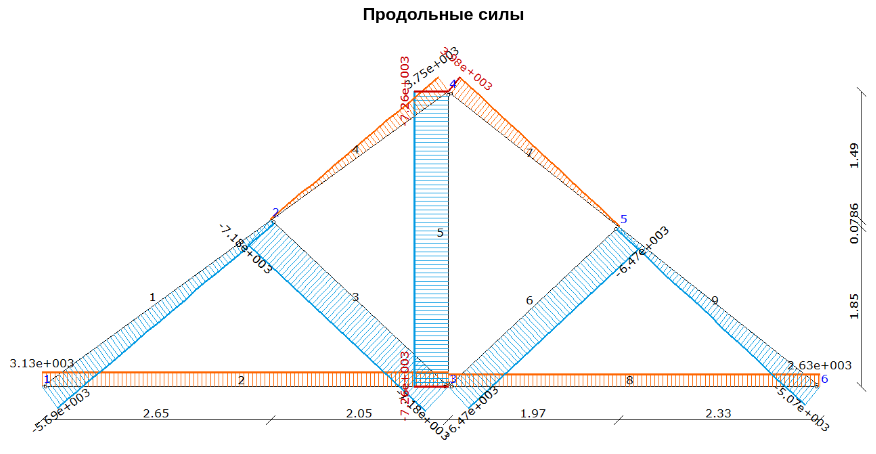


Эпюры изгибающих моментов:

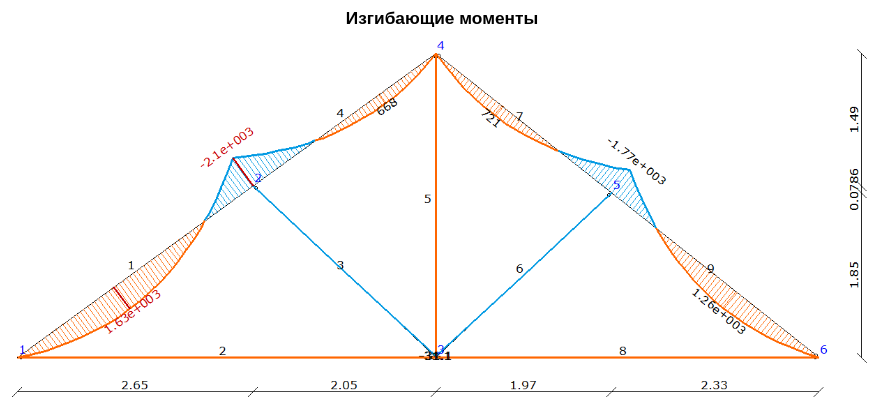

Эпюры продолных сил наглядно показывают, какие элементы являются сжатыми (синий), а какие растянутыми (красный). Растянутыми являются верхние части стропил (нагрузка тянет вниз) и затяжки — они компенсируют продольные распирающие силы.

Анализ эпюр продольных сил и изгибающих моментов позволяет выявить наиболее нагруженный элемент по совокупности этих двух факторов — это стержень 1 (нижний сегмент левой стропильной ноги).


#### Сегмент стропильной ноги

Стропильные ноги (их сегменты) подвергаются внецентренному сжатию и растяжению. Рассматриваемый сегмент стропильной ноги подвергается внецентренному сжатию (на него действует продольная сила и изгибающий момент).

Эпюры усилий в этом элементе:

<div>
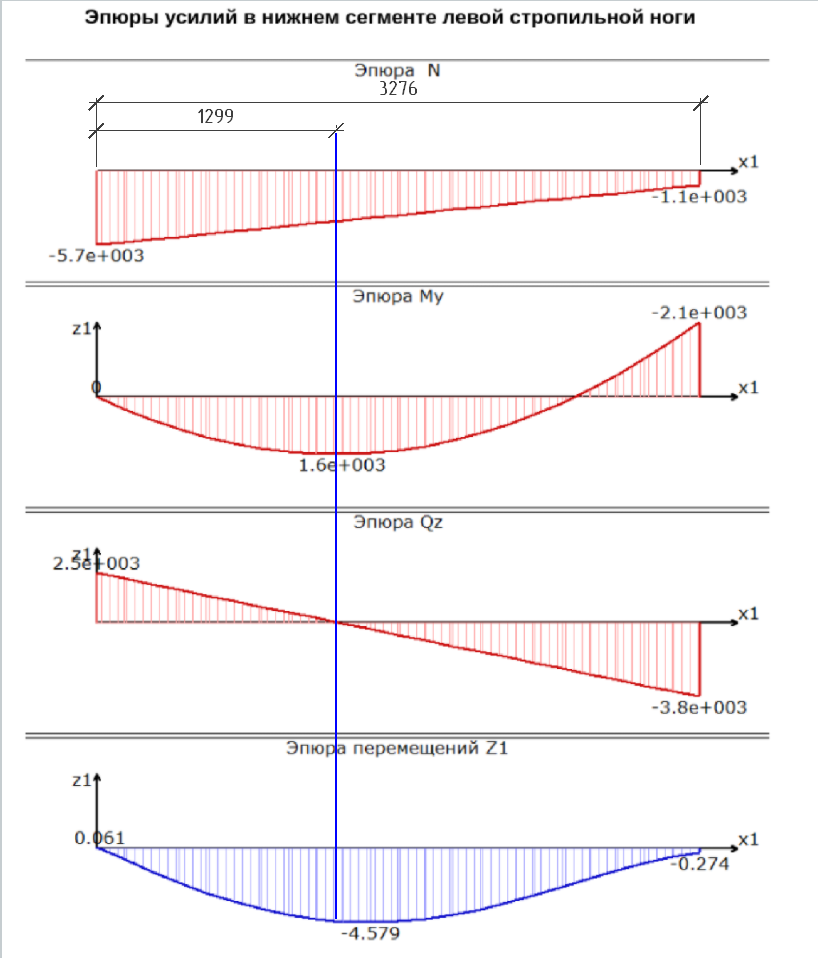
</div>

Самое напряженное место находится на расстоянии 1300 мм от левого края сегмента — сечение показано вертикальной синей линией. Величина изгибающего момента в этом месте максимальна и составляет $1.6 кН/м$. Величина продольной сжимающей силы может быть определена по формуле $\ref{eq5}$:

$
\begin{align}
\displaystyle
f = \frac{(f_{max} - f_{min})}{L} \cdot l + f_{min} \tag{5} \label{eq5},  \\
\end{align}
$

$
\begin{align}
\text{где  }& f_{max} \text{ - максимальное значение силы (левый край эпюры)} \\
& f_{min} \text{- минимальное значение силы (правый край эпюры)} \\
& L \text{- длина сегмента стропильной ноги} \\
& l \text{- расстояние от левого края сегмента до интересующего сечения}
\end{align}
$

In [5]:
fmax = 5700 # N
fmin = 1100 # N
L    = 3276 # mm
l    = 1300 # mm

f = (fmax - fmin)/L*l + fmin

print('f =', int(round(f)), 'N')

f = 2925 N


Расчёт на прочность сегмента стропильной ноги:

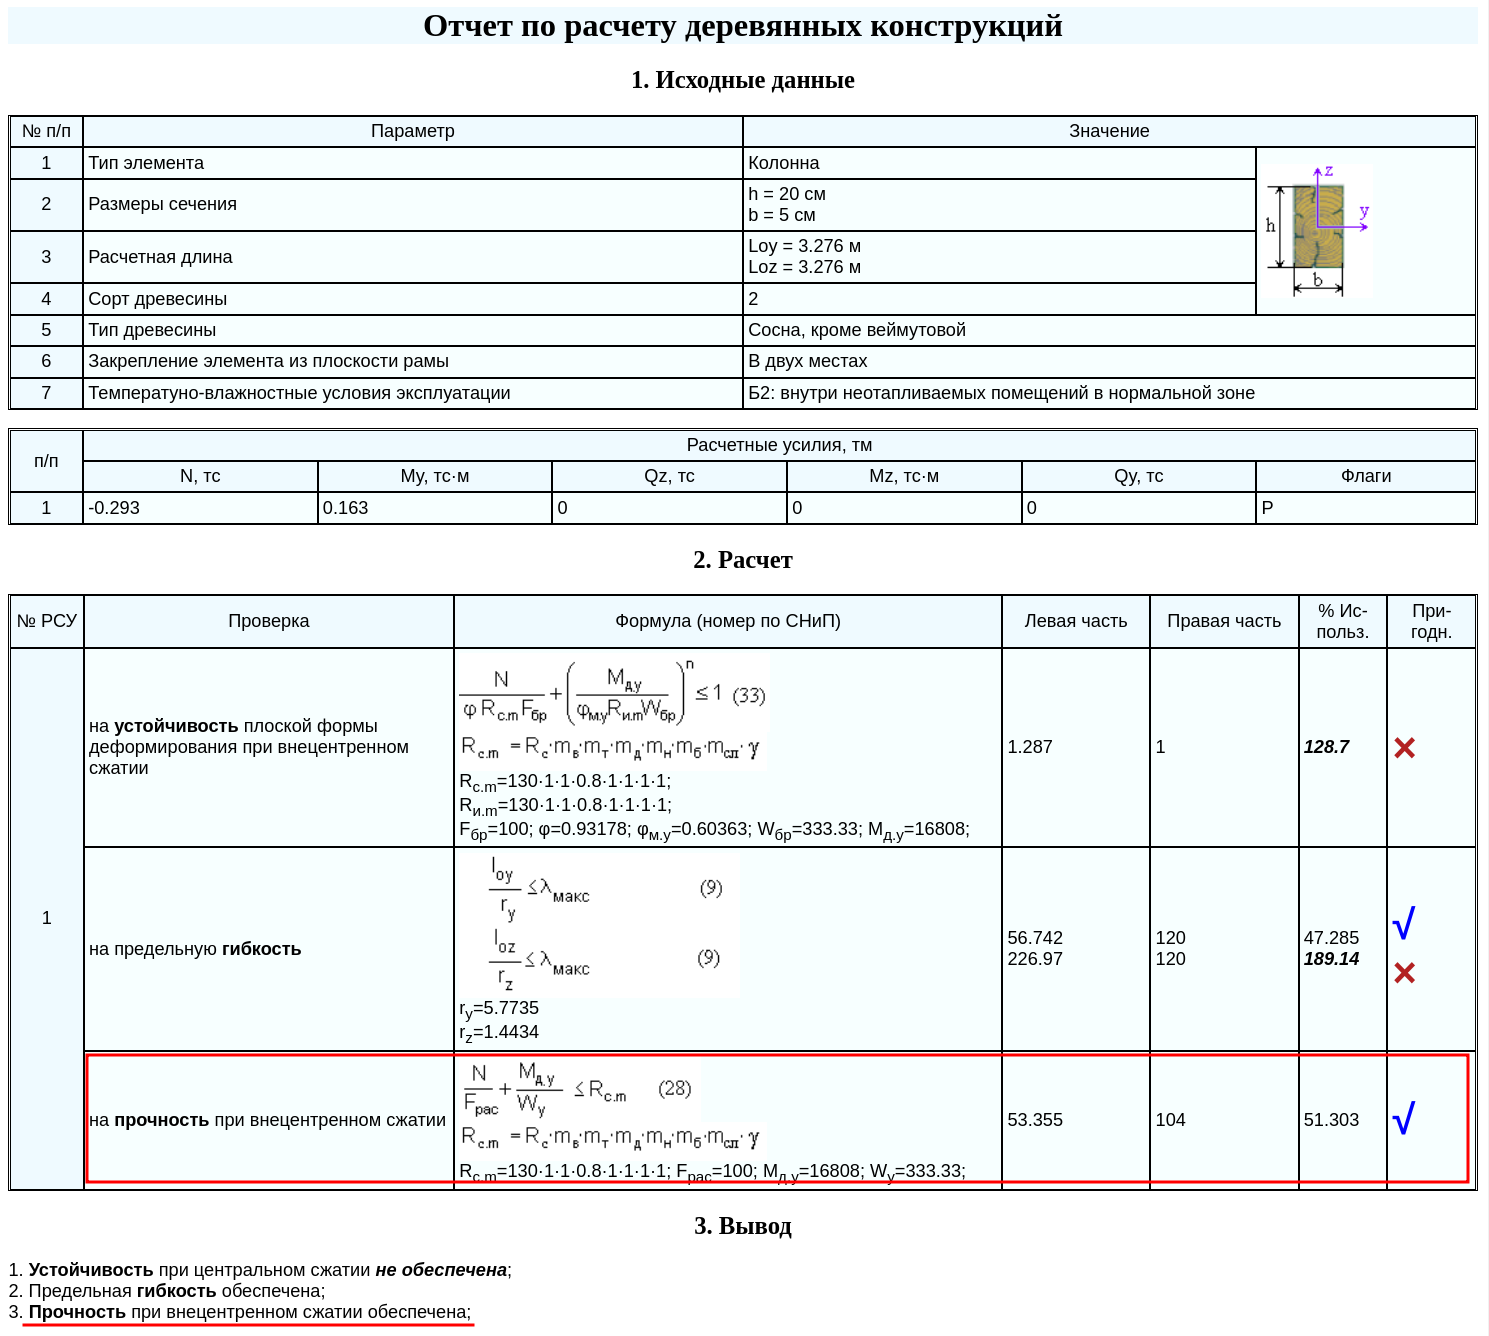

Результат расчёта показывает, что прочность при внецентренном сжатии обеспечена — это и есть главное искомое. На то, что расчёт на устойчивость плоской формы не удовлетворяет требованиям, обращать внимание не нужно: в данном случае стропильная ферма не является плоской формой, т.к. имеет фиксацию вдоль оси Y с помощью обрешётки. Точно так же и расчёт на предельную гибкость вокруг оси Z не следует принимать во внимание, т.е. стропильная нога в силу фиксации вдоль оси Y не изгибается вокруг оси Z.

Т.к. остальные сегменты стропильных ног имеют меньшие по величине продольные силы, изгибающие моменты, являются более короткими нежели рассмотренный сегмент, то состояние этих элементов находится ещё дальше от предельного, поэтому производить расчёт на прочность для них является нецелесообразным.



#### Центральная стойка

Центральная стойка является центрально сжатым элементом с силой $7.26 кН$. Расчёт на прочность для этого элемента при использовании того же материала и сечения, что и для стропильных ног — $200\times50 мм$ при длине $3.415м$:

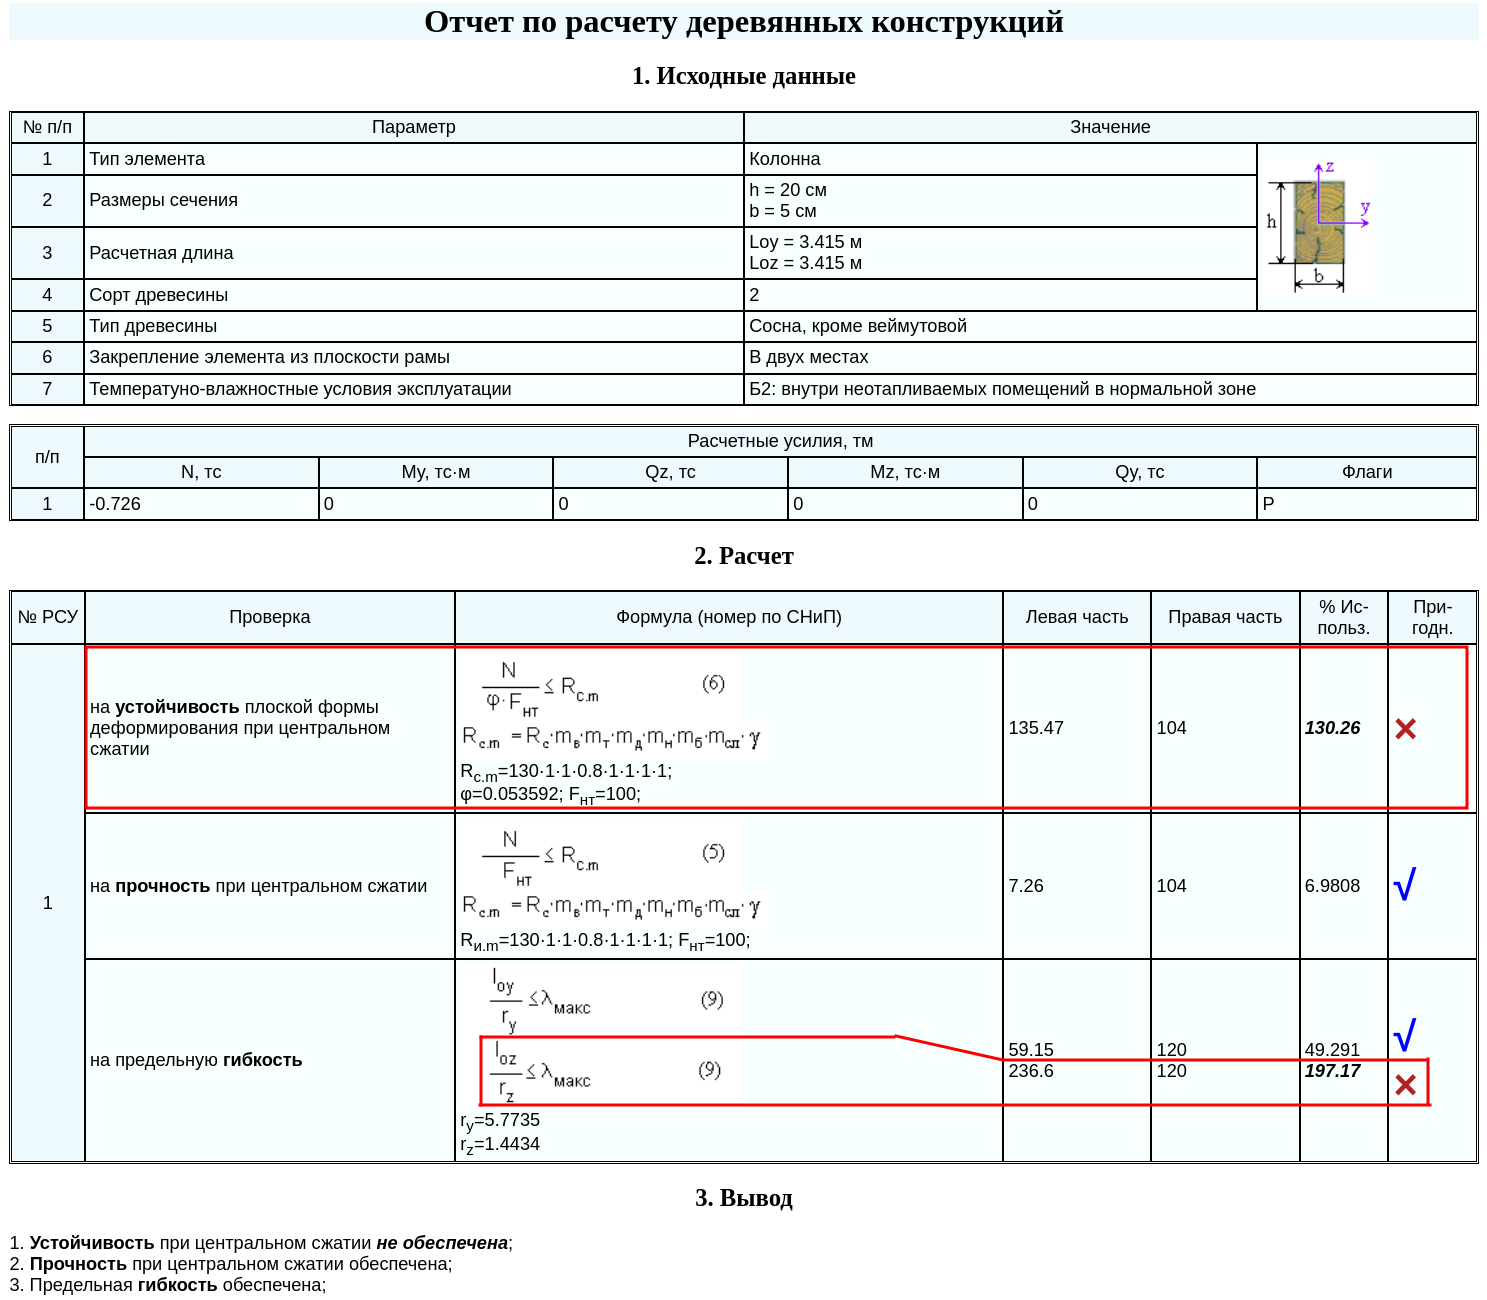

В данном случае уже нельзя игнорировать результаты расчёта на устойчивость плоской формы и предельную гибкость по любой из осей, т.к. стойка не имеет никакой фиксации по длине, закреплена только на концах. 

Из расчёта можно видеть, что прочность при центральном сжатии обеспечена и предельная гибкость по оси Y тоже. Это означает, что площадь поперечного сечения стойки достаточна для того, чтобы воспринимать нагрузку, а профиль сечения обеспечивает гибкость в одном из направлений (того, которое больше по размеру).

Для решения проблемы можно применить следующие варианты:

* создать фиксацию стойки в середине её пролёта поперёк тонкой стороны — это эффективно уменьшит длину стойки и не даст согнуться под нагрузкой;
* изменить сечение стойки — увеличить толщину доски.

Т.к. стойка подвергается одинаковым факторам вдоль осей X и Y, имеет смысл профиль сечения сделать симметричным — квадратным. При сохранении объёма материала (той же цене за $м^{3}$) профиль получается: $100\times100 мм$.


Расчёт стойки сечением $100\times100 мм$:

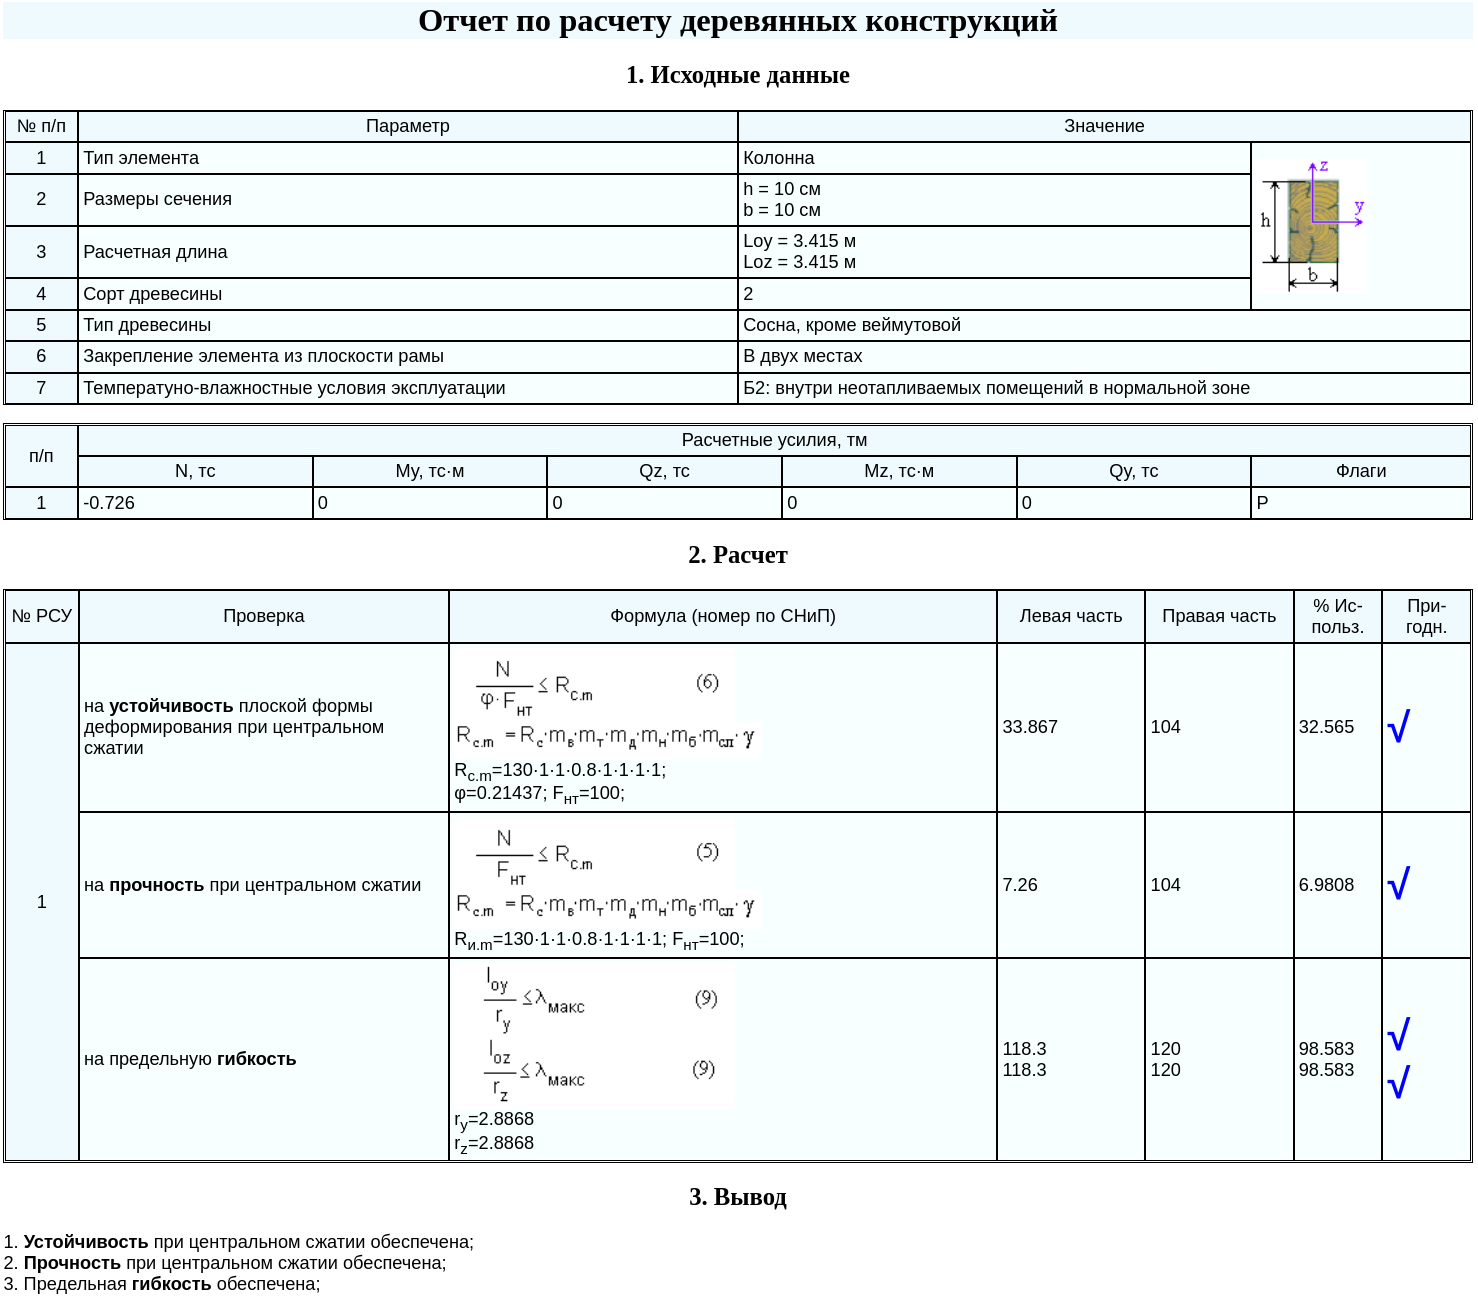

Результат расчёта даёт положительный ответ. Вариант с изменением сечения представляется более подходящим, т.к. не требует усложнения и удорожания конструкции за счёт дополнительных фиксирующих элементов.